Iteración 1, Mejor costo: 4428.41, Mejor distancia: 12540.32 km
Iteración 2, Mejor costo: 4428.41, Mejor distancia: 12540.32 km
Iteración 3, Mejor costo: 4408.25, Mejor distancia: 12483.23 km
Iteración 4, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 5, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 6, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 7, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 8, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 9, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 10, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 11, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 12, Mejor costo: 4095.19, Mejor distancia: 11596.72 km
Iteración 13, Mejor costo: 3942.18, Mejor distancia: 11163.44 km
Iteración 14, Mejor costo: 3596.45, Mejor distancia: 10184.39 km
Iteración 15, Mejor costo: 3249.46, Mejor distancia: 9201.8 km
Iteración 16, Mejor costo: 3249.46, 

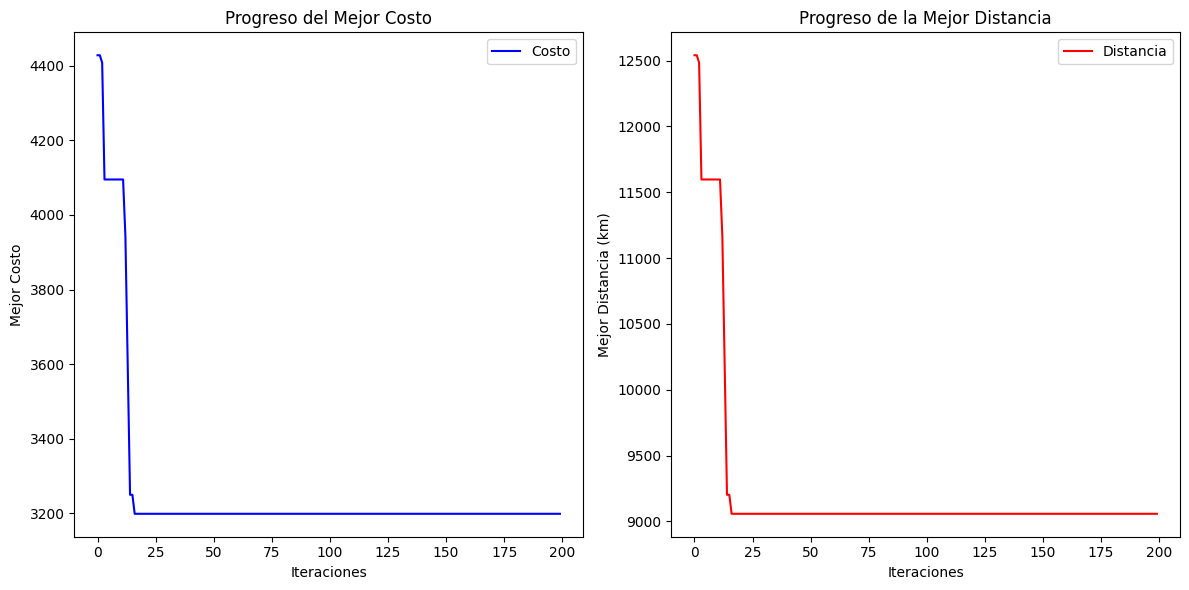

In [2]:
from math import atan2, cos, radians, sin, sqrt
import numpy as np
import random
import matplotlib.pyplot as plt  # Asegúrate de tener instalada matplotlib

# Parámetros del Algoritmo de Colonias de Hormigas (ACO)
num_hormigas = 20  # Número de hormigas en la simulación
num_iteraciones = 200  # Cantidad de iteraciones del algoritmo
evaporación = 0.5  # Tasa de evaporación de las feromonas
alpha = 1.0  # Peso de la importancia de las feromonas
beta = 2.0  # Peso de la importancia de la heurística

# Parámetros relacionados con el vehículo y costos adicionales
definir_carro = {
    "consumo_combustible": 0.0945,  # Consumo de combustible en litros por kilómetro
    "costo_litro_combustible": 1.4,  # Precio del litro de combustible en dólares
}
tarifa_hora_vendedor = 7.25  # Costo por hora del vendedor en dólares
peajes_por_km = 0.1  # Costo promedio de peaje por kilómetro

# Establecer una semilla para generar resultados reproducibles
np.random.seed(42)

# Coordenadas de las capitales de los estados mexicanos, representadas en un diccionario
coordenadas_capitales = {
    "Aguascalientes": (21.8823, -102.2826),
    "Mexicali": (32.6245, -115.4523),
    "La Paz": (24.1444, -110.3005),
    "Campeche": (19.8301, -90.5349),
    "Saltillo": (25.4382, -100.9764),
    "Colima": (19.2433, -103.7250),
    "Tuxtla Gutiérrez": (16.7569, -93.1292),
    "Chihuahua": (28.6320, -106.0691),
    "Ciudad de México": (19.4326, -99.1332),
    "Durango": (24.0277, -104.6532),
    "Guanajuato": (21.0181, -101.2587),
    "Chilpancingo": (17.5515, -99.5058),
    "Pachuca": (20.1011, -98.7591),
    "Guadalajara": (20.6597, -103.3496),
    "Toluca": (19.2826, -99.6557),
    "Morelia": (19.7032, -101.2574),
    "Cuernavaca": (18.9186, -99.2340),
    "Tepic": (21.5067, -104.8934),
    "Monterrey": (25.6866, -100.3161),
    "Oaxaca": (17.0732, -96.7266),
    "Puebla": (19.0414, -98.2063),
    "Querétaro": (20.5888, -100.3899),
    "Chetumal": (18.5036, -88.3054),
    "San Luis Potosí": (22.1565, -100.9855),
    "Culiacán": (24.8091, -107.3940),
    "Hermosillo": (29.0729, -110.9559),
    "Villahermosa": (17.9895, -92.9475),
    "Ciudad Victoria": (23.7369, -99.1411),
    "Tlaxcala": (19.3182, -98.2373),
    "Xalapa": (19.5429, -96.9103),
    "Mérida": (20.9674, -89.5926),
    "Zacatecas": (22.7709, -102.5833),
}

# Convertir las coordenadas de capitales a listas y arreglos para facilitar su uso
capitales = list(coordenadas_capitales.keys())
coordenadas = np.array(list(coordenadas_capitales.values()))


def calcular_distancias(coord1, coord2):
    """Calcula la distancia geodésica entre dos puntos utilizando la fórmula de Haversine"""
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


# Crear matriz de distancias entre las ciudades utilizando las coordenadas geodésicas
num_ciudades = len(capitales)
matriz_ditancias = np.zeros((num_ciudades, num_ciudades))
for i in range(num_ciudades):
    for j in range(num_ciudades):
        if i != j:
            matriz_ditancias[i, j] = calcular_distancias(coordenadas[i], coordenadas[j])

# Inicializar la matriz de feromonas para el algoritmo ACO
feromonas = np.ones((num_ciudades, num_ciudades))


def probabilidad_movimiento(
    ciudad_actual, no_visitadas, feromonas, distancias, alpha, beta
):
    """Calcula la probabilidad de moverse a la próxima ciudad usando la fórmula ACO"""
    feromonas_actuales = feromonas[ciudad_actual, no_visitadas] ** alpha
    visibilidad = (1.0 / distancias[ciudad_actual, no_visitadas]) ** beta
    probabilidades = feromonas_actuales * visibilidad
    return probabilidades / np.sum(probabilidades)


def construir_solucion(feromonas, distancias):
    """Construye una solución (ruta) utilizando el tipo heurístico empleado por el ACO"""
    no_visitadas = list(range(num_ciudades))
    ciudad_actual = random.choice(no_visitadas)
    recorrido = [ciudad_actual]
    no_visitadas.remove(ciudad_actual)

    while no_visitadas:
        probs = probabilidad_movimiento(
            ciudad_actual, no_visitadas, feromonas, distancias, alpha, beta
        )
        ciudad_siguiente = random.choices(no_visitadas, weights=probs)[0]
        recorrido.append(ciudad_siguiente)
        no_visitadas.remove(ciudad_siguiente)
        ciudad_actual = ciudad_siguiente

    return recorrido


def actualizar_feromonas(feromonas, todas_rutas, distancias, evaporación):
    """Actualiza la intensidad de las feromonas en la matriz tras cada iteración"""
    feromonas *= 1 - evaporación
    for ruta in todas_rutas:
        coste, _ = calcular_costo_y_distancia_ruta(
            ruta, distancias, definir_carro, tarifa_hora_vendedor, peajes_por_km
        )
        for i in range(len(ruta) - 1):
            feromonas[ruta[i], ruta[i + 1]] += 1.0 / coste
        feromonas[ruta[-1], ruta[0]] += 1.0 / coste


def calcular_costo_y_distancia_ruta(
    ruta, matriz_distancias, carro, tarifa_hora, peajes_km, velocidad_promedio=60
):
    """Calcula el costo total y la distancia para un recorrido específico"""
    costo_total = 0
    distancia_total = 0
    for i in range(len(ruta) - 1):
        ciudad_a, ciudad_b = ruta[i], ruta[i + 1]
        distancia = matriz_distancias[ciudad_a][ciudad_b]
        distancia_total += distancia

        # Combustible
        costo_combustible = (
            distancia * carro["consumo_combustible"] * carro["costo_litro_combustible"]
        )
        # Peajes
        costo_peaje = distancia * peajes_km

        # Sumar costos al total
        costo_total += costo_combustible + costo_peaje

    # Añadir última distancia y tiempo para regreso a la ciudad inicial
    distancia_retorno = matriz_distancias[ruta[-1]][ruta[0]]
    distancia_total += distancia_retorno
    tiempo_total = distancia_total / velocidad_promedio

    # Combustible y peajes para el último tramo
    costo_combustible_final = (
        distancia_retorno
        * carro["consumo_combustible"]
        * carro["costo_litro_combustible"]
    )
    costo_peaje_final = distancia_retorno * peajes_km

    costo_total += costo_combustible_final + costo_peaje_final

    # Agregar costo del tiempo del vendedor
    costo_vendedor = tiempo_total * tarifa_hora
    costo_total += costo_vendedor

    return costo_total, distancia_total


# Ejecución del algoritmo ACO
mejor_costo = float("inf")
mejor_distancia = float("inf")
mejor_recorrido = None
historial_costos = []
historial_distancias = []

for iteracion in range(num_iteraciones):
    todas_rutas = [
        construir_solucion(feromonas, matriz_ditancias) for _ in range(num_hormigas)
    ]
    resultados = [
        calcular_costo_y_distancia_ruta(
            ruta, matriz_ditancias, definir_carro, tarifa_hora_vendedor, peajes_por_km
        )
        for ruta in todas_rutas
    ]
    costos, distancias = zip(*resultados)

    # Encuentra la mejor ruta de esta iteración
    index_mejor = np.argmin(costos)
    if costos[index_mejor] < mejor_costo:
        mejor_costo = costos[index_mejor]
        mejor_distancia = distancias[index_mejor]
        mejor_recorrido = todas_rutas[index_mejor]

    # Almacena las métricas para esta iteración
    historial_costos.append(mejor_costo)
    historial_distancias.append(mejor_distancia)

    actualizar_feromonas(feromonas, todas_rutas, matriz_ditancias, evaporación)

    print(
        f"Iteración {iteracion+1}, Mejor costo: {round(mejor_costo, 2)}, Mejor distancia: {round(mejor_distancia, 2)} km"
    )

print(
    f"\nMejor recorrido encontrado: {mejor_recorrido} con un costo de: {round(mejor_costo, 2)} dolares y una distancia total de: {round(mejor_distancia, 2)} km"
)

# Graficar el progreso del costo y distancia
plt.figure(figsize=[12, 6])

# Graficar costo
plt.subplot(1, 2, 1)
plt.plot(historial_costos, label="Costo", color="b")
plt.xlabel("Iteraciones")
plt.ylabel("Mejor Costo")
plt.title("Progreso del Mejor Costo")
plt.legend()

# Graficar distancia
plt.subplot(1, 2, 2)
plt.plot(historial_distancias, label="Distancia", color="r")
plt.xlabel("Iteraciones")
plt.ylabel("Mejor Distancia (km)")
plt.title("Progreso de la Mejor Distancia")
plt.legend()

plt.tight_layout()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


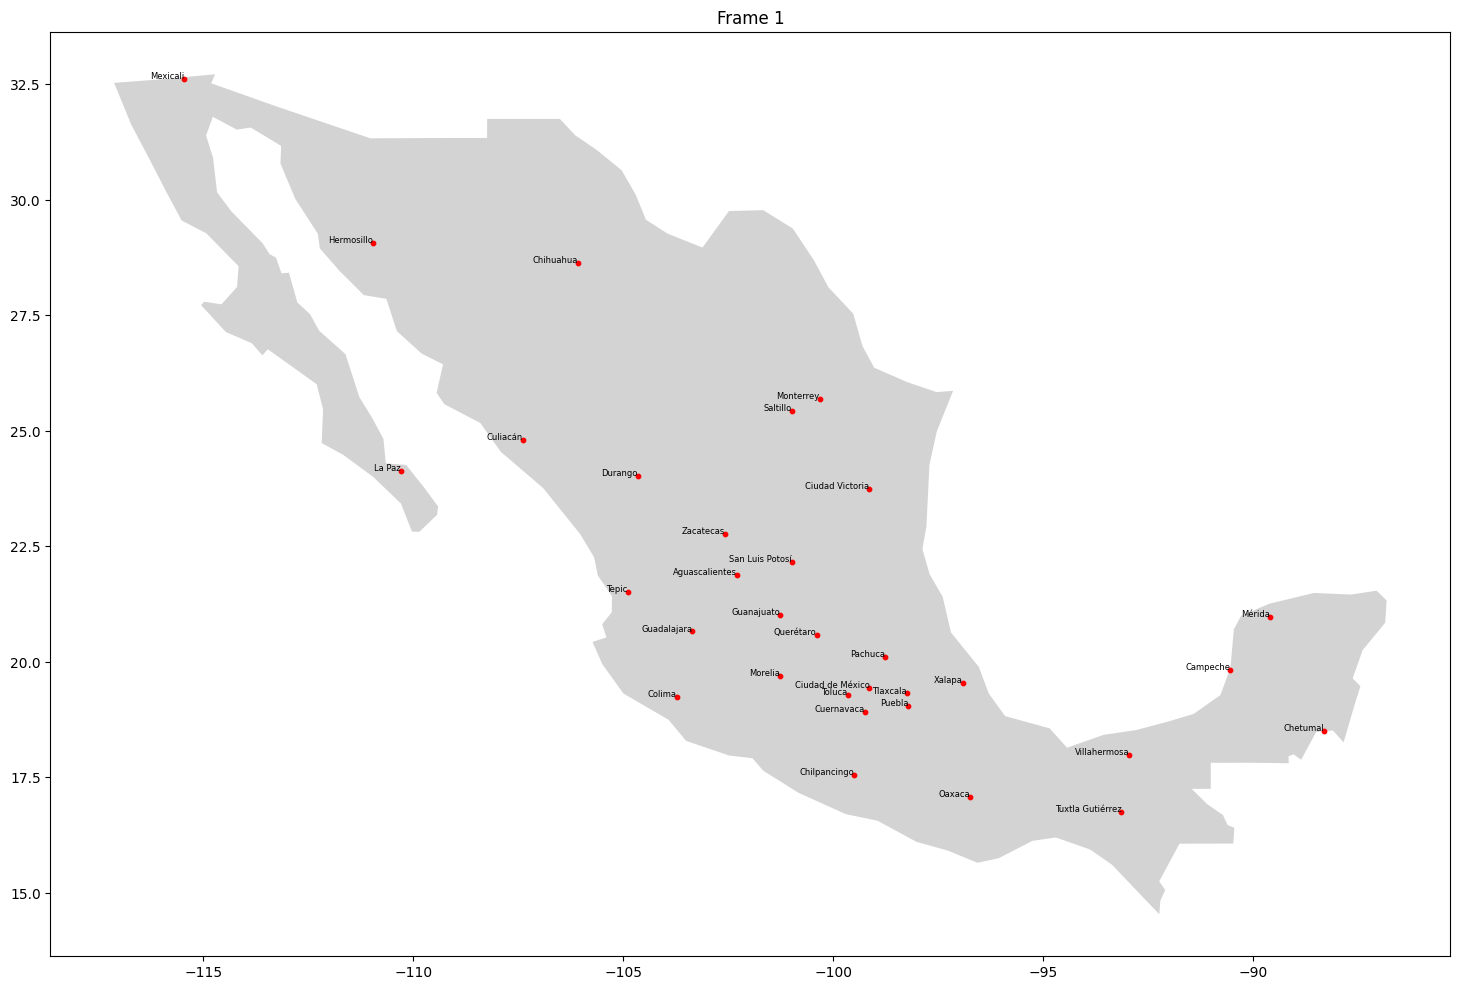

In [3]:
# Importar las bibliotecas necesarias para el manejo de datos geoespaciales y para visualización
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import Point, LineString
import random  # Se usa para simular un recorrido aleatorio si fuera necesario

# Ruta al shapefile que contiene datos geoespaciales de los límites políticos del mundo
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Leer el shapefile usando GeoPandas y verificar las columnas para filtrar por México
world = gpd.read_file(shapefile_path)

# Extraer el mapa de México utilizando la columna 'ADMIN' para identificar el país
mexico_map = world[world["ADMIN"] == "Mexico"]

# Diccionario con las coordenadas geográficas de las capitales de los estados mexicanos
coordenadas_capitales = {
    "Aguascalientes": (21.8823, -102.2826),
    "Mexicali": (32.6245, -115.4523),
    "La Paz": (24.1444, -110.3005),
    "Campeche": (19.8301, -90.5349),
    "Saltillo": (25.4382, -100.9764),
    "Colima": (19.2433, -103.7250),
    "Tuxtla Gutiérrez": (16.7569, -93.1292),
    "Chihuahua": (28.6320, -106.0691),
    "Ciudad de México": (19.4326, -99.1332),
    "Durango": (24.0277, -104.6532),
    "Guanajuato": (21.0181, -101.2587),
    "Chilpancingo": (17.5515, -99.5058),
    "Pachuca": (20.1011, -98.7591),
    "Guadalajara": (20.6597, -103.3496),
    "Toluca": (19.2826, -99.6557),
    "Morelia": (19.7032, -101.2574),
    "Cuernavaca": (18.9186, -99.2340),
    "Tepic": (21.5067, -104.8934),
    "Monterrey": (25.6866, -100.3161),
    "Oaxaca": (17.0732, -96.7266),
    "Puebla": (19.0414, -98.2063),
    "Querétaro": (20.5888, -100.3899),
    "Chetumal": (18.5036, -88.3054),
    "San Luis Potosí": (22.1565, -100.9855),
    "Culiacán": (24.8091, -107.3940),
    "Hermosillo": (29.0729, -110.9559),
    "Villahermosa": (17.9895, -92.9475),
    "Ciudad Victoria": (23.7369, -99.1411),
    "Tlaxcala": (19.3182, -98.2373),
    "Xalapa": (19.5429, -96.9103),
    "Mérida": (20.9674, -89.5926),
    "Zacatecas": (22.7709, -102.5833),
}

# Convertir las coordenadas de las capitales a una GeoDataFrame para fácil manejo
capitales_names = list(coordenadas_capitales.keys())
capitales_coords = np.array(list(coordenadas_capitales.values()))
capitales_gdf = gpd.GeoDataFrame(
    {
        "nombre": capitales_names,
        "geometry": [Point(lon, lat) for lat, lon in capitales_coords],
    },
    crs="EPSG:4326",
)

# Simulación del mejor recorrido - Esto debería ser reemplazado con el resultado del algoritmo
# Aquí se utiliza un recorrido hipotético como ejemplo en el formato de índices de las capitales
mejor_recorrido = mejor_recorrido  # Asegúrate de asignar este variable con el mejor recorrido calculado

# Crear la figura y el eje para el gráfico usando Matplotlib
fig, ax = plt.subplots(figsize=(20, 12))
mexico_map.plot(ax=ax, color="lightgrey")


# Función de actualización para la animación, que muestra paso a paso el progreso del recorrido
def update(num, mejor_recorrido, ax, capitales_gdf):
    ax.clear()
    mexico_map.plot(ax=ax, color="lightgrey")
    # Trazar el camino recorrido hasta el momento
    points = [capitales_gdf.iloc[i].geometry for i in mejor_recorrido[: num + 1]]
    if len(points) > 1:
        line = LineString(points)
        new_gdf = gpd.GeoSeries([line])
        new_gdf.plot(ax=ax, color="blue", linewidth=2)
    capitales_gdf.plot(ax=ax, color="red", markersize=10)
    for x, y, label in zip(
        capitales_gdf.geometry.x, capitales_gdf.geometry.y, capitales_gdf.nombre
    ):
        ax.text(x, y, label, fontsize=6, ha="right")
    ax.set_title(f"Frame {num + 1}")


# Crear la animación usando FuncAnimation de Matplotlib
ani = FuncAnimation(
    fig,
    update,
    frames=len(mejor_recorrido),
    fargs=(mejor_recorrido, ax, capitales_gdf),
    repeat=False,
)

# Guardar la animación como un archivo GIF usando ImageMagick como escritor
ani.save("recorrido_mexico.gif", writer="imagemagick", fps=2)